## 回帰 Model の評価方法

In [1]:
# 余分な Warning を非表示にする
import warnings

warnings.filterwarnings('ignore')

# Library の Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# matplotlib 日本語化対応
import japanize_matplotlib

# 表示 Option の調整
np.set_printoptions(suppress=True, precision=4)  # NumPy の浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format  # pandas での浮動小数点の表示精度
pd.set_option('display.max_columns', None)  # DataFrame ですべての項目を表示
plt.rcParams['font.size'] = 14  # Graph の Default font 指定
random_seed = 123  # 乱数の種

In [2]:
# Data の読み込みから Data 分割まで

# Data 読み込み（Boston･Dataset）
from sklearn.datasets import load_boston
boston = load_boston()

# df: 入力 Data
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# y: 正解 Data
y = boston.target

# １項目だけの入力 Data df1 を作る
df1 = df[['RM']]

# 結果確認
display(df.head())
display(df1.head())
print(y[:5])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


,RM
0,6.5750
1,6.4210
2,7.1850
3,6.9980
4,7.1470


[24.  21.6 34.7 33.4 36.2]


In [3]:
# Algorithm 選定から予測まで

# Algorithm: XGBRegressor
from xgboost import XGBRegressor
algorithm1 = XGBRegressor(objective = 'reg:squarederror', random_state=random_seed)

# 学習（入力 Data に df1 を利用）
algorithm1.fit(df1, y)

# 予測
y_pred1 = algorithm1.predict(df1)

# Algorithm: XGBRegressor
algorithm2 = XGBRegressor(objective='reg:squarederror', random_state=random_seed)

# 学習（入力 Data に df を利用）
algorithm2.fit(df, y)

# 予測
y_pred2 = algorithm2.predict(df)

In [4]:
# 結果表示
print(f'y[:5] {y[:5]}')
print(f'y_pred1[:5] {y_pred1[:5]}')
print(f'y_pred2[:5] {y_pred2[:5]}')

y[:5] [24.  21.6 34.7 33.4 36.2]
y_pred1[:5] [24.2265 20.5349 34.8044 32.9725 35.9762]
y_pred2[:5] [24.0193 21.5997 34.7074 33.4074 36.1893]


- y_pred1
- y_pred2

この２つの予測結果が正解 Data にどの程度近いのか調べていく。

#### ２つの評価方法
1. x 軸に正解 Data, y 軸に予測結果、とした散布図を描画する。
  ※全ての予測結果が正解 Data にぴったり一致した理想的な結果の場合散布図のすべてに点は y=x の直線上にのるはず。そこで、この直線から個々の点がどの程度離れているかを見えることで、視覚的に Model の性能を確認する。
2. **「決定係数」** を算出して、その値を基に判断する。

In [5]:
# y の最大値と最小値の計算
y_range = np.array([y.min(), y.max()])

# 結果確認
print(y_range)

[ 5. 50.]


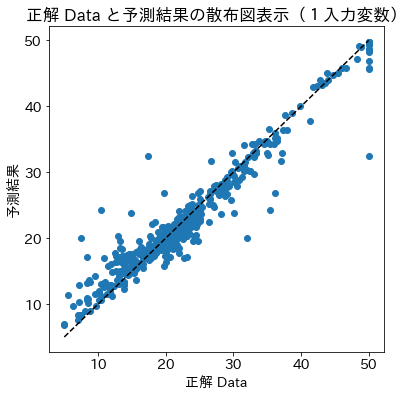

In [6]:
# 散布図による結果確認（１入力変数）

# 描画 Size 指定
plt.figure(figsize=(6, 6))

# 散布図
plt.scatter(y, y_pred1)

# 正解 Data = 予測結果の直線
plt.plot(y_range, y_range, 'k--')

# Label･Title
plt.xlabel('正解 Data')
plt.ylabel('予測結果')
plt.title('正解 Data と予測結果の散布図表示（１入力変数）')

plt.show()

点線に近いところにある点が多く、ある程度の正しい予測はできていそうな感じ。